# taq_trade_sign_self_correlator_week_avg_plot

#### Juan Camilo Henao Londono - 12.03.2019
#### AG Guhr - Universitaet Duisburg-Essen

In the following [link]() can be seen the plot of the function's results

In [1]:
# Modules

import numpy as np
from matplotlib import pyplot as plt
import os

import pickle

import taq_data_tools

__tau__ = 1000

In [2]:
def taq_trade_sign_cross_correlator_week_avg_plot(ticker_i, ticker_j, year, month, days):
    """
    Plot the average trade sign cross correlator during a week and the dayly self response
    contributions in a figure. The data is loaded from the trade sign cross correlator data
    results.
        :param ticker: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2008')
        :param month: string of the month to be analized (i.e '07')
        :param days: List of strings with the days to be analized
         (i.e ['07', '08', '09'])
    """

    if (ticker_i == ticker_j):

        return None

    else:

        figure = plt.figure(figsize=(16, 9))

        plot_data = np.zeros(__tau__)

        for i, day in enumerate(days):

            function_name = taq_trade_sign_cross_correlator_week_avg_plot.__name__
            taq_data_tools.taq_function_header_print_plot(function_name,
                                                          ticker_i, ticker_j,
                                                          year, month, day)

            load_day = pickle.load(open(''.join((
                '../taq_data_{2}/taq_trade_sign_cross_correlator_data'
                + '/taq_trade_sign_cross_correlator_data_{2}{3}{4}_{0}i_{1}j'
                + '.pickle').split())
                .format(ticker_i, ticker_j, year, month, day), 'rb'))
            
            plot_data += load_day

            plt.loglog(load_day, '-', alpha=0.4,
                         label='Stock i {} - Stock j {} - Day {}'
                         .format(ticker_i, ticker_j, day))

        plot_data = plot_data / len(days)

        plt.loglog(plot_data, '-g', linewidth=5,
                     label='Stock i {} - Stock j {} - Week Average'
                     .format(ticker_i, ticker_j))
        plt.ylim([10E-6, 10])
        plt.xlabel(r'Time lag $[\tau]$')
        plt.ylabel(r'Trade sign cross correlator $ \Theta_{ij} (\tau) $')
        plt.legend(loc='best')
        plt.title('Cross response - ticker i {} ticker j {} - {}.{}-{}'
                  .format(ticker_i, ticker_j, month, days[0], days[-1]))
        
        plt.grid(True)
        plt.tight_layout()

        # Plotting
        taq_data_tools.taq_save_plot(function_name, figure, ticker_i,
                                     ticker_j, year, month)

        return None

TAQ data
taq_trade_sign_cross_correlator_week_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.03.10
TAQ data
taq_trade_sign_cross_correlator_week_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.03.11
TAQ data
taq_trade_sign_cross_correlator_week_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.03.12
TAQ data
taq_trade_sign_cross_correlator_week_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.03.13
TAQ data
taq_trade_sign_cross_correlator_week_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.03.14
Plot saved



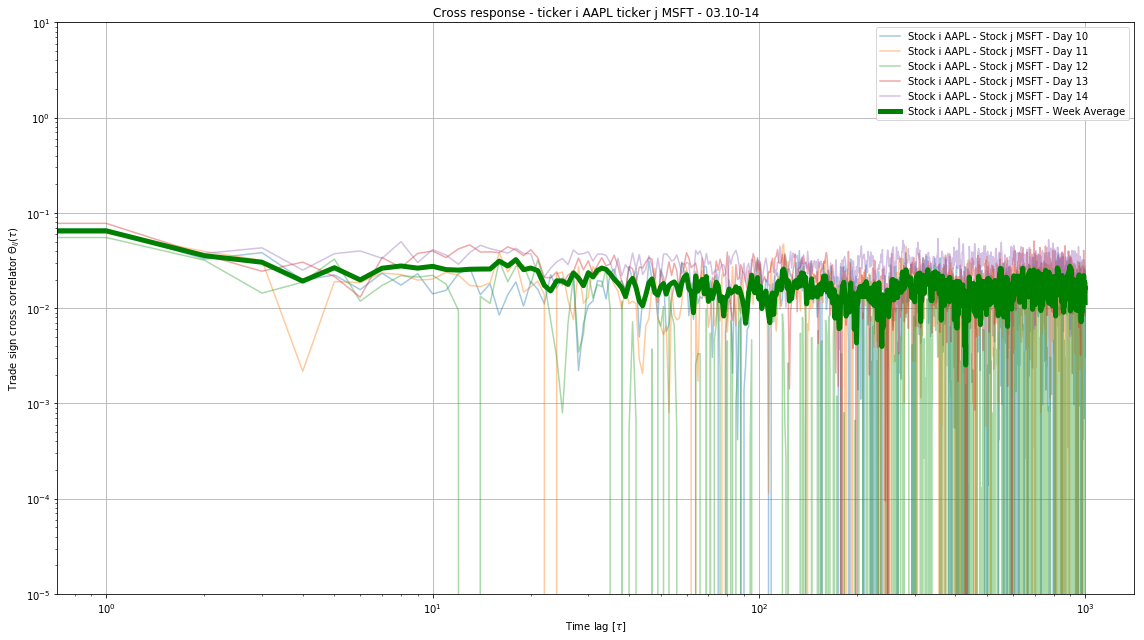

In [3]:
# Test

ticker_i = 'AAPL'
ticker_j = 'MSFT'
year = '2008'
month = '03'
days = ['10', '11', '12', '13', '14']

taq_trade_sign_cross_correlator_week_avg_plot(ticker_i, ticker_j, year, month, days)